<a href="https://colab.research.google.com/github/aryawicaksana/idhs/blob/main/abbusiveChalenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pernyataan masalah**

Perkembangan media sosial memungkinkan orang untuk mengekspresikan pendapat mereka secara online. Namun, pada saat yang sama, hal ini mengakibatkan munculnya konflik dan kebencian, membuat lingkungan online tidak menarik bagi pengguna. Meskipun para peneliti telah menemukan bahwa kebencian adalah masalah di berbagai platform, ada kekurangan model untuk deteksi kebencian online.

Ucapan kebencian atau ujaran kebencian (Inggris: hate speech) adalah tindakan komunikasi yang dilakukan oleh suatu individu atau kelompok dalam bentuk provokasi, hasutan, ataupun hinaan kepada individu atau kelompok yang lain dalam hal berbagai aspek seperti ras, warna kulit, etnis, gender, cacat, orientasi seksual, kewarganegaraan, agama, dan lain-lain.


**Sementara di Indonesia**

R. Susilo menerangkan bahwa yang dimaksud dari "menghina" adalah "menyerang kehormatan dan nama baik seseorang". Yang terkena dampak hate speech biasanya merasa malu. Menurutnya, penghinaan terhadap satu individu ada 6 macam yaitu[9]

1. Menista dengan surat/tertulis (smaadschrift)
2. Memfitnah (laster)
3. Penghinaan ringan (eenvoudige belediging)
4. Mengadu secara memfitnah (lasterlijke aanklacht)
5. Tuduhan secara memfitnah (lasterlijke verdachtmaking)
 
Semua penghinaan tersebut hanya dapat dituntut jika ada pengaduan dari individu yang terkena dampak penghinaan,


Tujuan saya adalah membangun prototipe pengklasifikasi komentar kebencian dan pelecehan online yang dapat digunakan untuk mengklasifikasikan komentar kebencian dan menyinggung sehingga dapat dikontrol dan dibatasi dari penyebaran kebencian dan penindasan maya.

In [12]:
from google.colab import files
!pip install -q kaggle

In [14]:
uploaded = files.upload()
!mv /content/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text

Saving kaggle.json to kaggle (1).json
  0% 0.00/814k [00:00<?, ?B/s]
100% 814k/814k [00:00<00:00, 55.4MB/s]


In [15]:
!unzip indonesian-abusive-and-hate-speech-twitter-text.zip

Archive:  indonesian-abusive-and-hate-speech-twitter-text.zip
  inflating: README.md               
  inflating: abusive.csv             
  inflating: citation.bib            
  inflating: data.csv                
  inflating: new_kamusalay.csv       


In [16]:
import pandas as pd
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")
kamus = pd.read_csv('new_kamusalay.csv', encoding = "ISO-8859-1")

In [28]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [20]:
df.describe()


,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.describe(include=['O'])

,Tweet
count,13169
unique,13023
top,USER USER USER USER USER USER USER USER USER U...
freq,9


In [22]:
display(df.isnull().sum())

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [69]:
display(df.duplicated().sum())

125

In [17]:
df.drop_duplicates(inplace=True)

In [71]:
display(df.duplicated().sum())

0

In [45]:
kamus

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin
...,...,...
15161,mendikbud,menteri pendidikan dan kebudayaan
15162,mendag,menteri perdagangan
15163,menaker,menteri tenaga kerja
15164,memetwit,mentwit


In [18]:
finder = pd.Series(kamus['anakjakartaasikasik']).array
replacer = pd.Series(kamus['anak jakarta asyik asyik']).array
df['Tweet'] = df['Tweet'].replace(finder, replacer)

In [19]:
df['Tweet']

0        - disaat semua cowok berusaha melacak perhatia...
1        RT USER: USER siapa yang telat ngasih tau elu?...
2        41. Kadang aku berfikir, kenapa aku tetap perc...
3        USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4        USER USER Kaum cebong kapir udah keliatan dong...
                               ...                        
13164    USER jangan asal ngomong ndasmu. congor lu yg ...
13165                         USER Kasur mana enak kunyuk'
13166    USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167    USER USER USER USER Bom yang real mudah terdet...
13168    USER Mana situ ngasih(": itu cuma foto ya kuti...
Name: Tweet, Length: 13044, dtype: object

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
import string
def punctuation_removal(text):
  nopunct = "".join([c for c in text if c not in string.punctuation])
  return nopunct

In [22]:
comment = df['Tweet'].apply(lambda x:punctuation_removal(x))
comment

0         disaat semua cowok berusaha melacak perhatian...
1        RT USER USER siapa yang telat ngasih tau elued...
2        41 Kadang aku berfikir kenapa aku tetap percay...
3        USER USER AKU ITU AKUnnKU TAU MATAMU SIPIT TAP...
4        USER USER Kaum cebong kapir udah keliatan dong...
                               ...                        
13164    USER jangan asal ngomong ndasmu congor lu yg s...
13165                          USER Kasur mana enak kunyuk
13166    USER Hati hati bisu  gnnlagi bosan huft xf0x9f...
13167    USER USER USER USER Bom yang real mudah terdet...
13168    USER Mana situ ngasih itu cuma foto ya kutil onta
Name: Tweet, Length: 13044, dtype: object

In [23]:
from nltk.stem.snowball import SnowballStemmer
from string import punctuation
def clean_doc(text):
	# split into tokens by white space
	tokens = text.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('indonesian'))
	tokens = [w for w in tokens if not w in stop_words]  
	#the stemmer requires a language parameter
	snow_stemmer = SnowballStemmer(language='english')
	tokens = [snow_stemmer.stem(x) for x in tokens]  
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	tokens = ' '.join(tokens)
	return tokens

In [24]:
commento = comment.apply(lambda x:clean_doc(x))

In [25]:
commento

0        disaat cowok berusaha melacak perhatian gue lo...
1        rt user user telat ngasih tau eluedan sarap gu...
2        kadang berfikir percaya tuhan jatuh berkalikal...
3        user user aku itu akunnku tau matamu sipit tap...
4        user user kaum cebong kapir udah keliatan dong...
                               ...                        
13164              user ngomong ndasmu congor lu yg anjyng
13165                               user kasur enak kunyuk
13166               user hati hati bisu gnnlagi bosan huft
13167    user user user user bom real mudah terdeteksi ...
13168             user mana situ ngasih foto ya kutil onta
Name: Tweet, Length: 13044, dtype: object

In [83]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
comment = commento.values
label = df[['HS',	'Abusive'	,'HS_Individual',	'HS_Group'	,'HS_Religion',	'HS_Race',	'HS_Physical',	'HS_Gender'	,'HS_Other'	,'HS_Weak',	'HS_Moderate'	,'HS_Strong']].values

In [87]:
comment

array(['disaat cowok berusaha melacak perhatian gue loe lanta remehkan perhatian yg gue kasih khusus elo basic elo cowok bego',
       'rt user user telat ngasih tau eluedan sarap gue bergaul cigax jifla cali noh licew',
       'kadang berfikir percaya tuhan jatuh berkalikali kadang tuhan ninggalkan ketika orangtuaku berencana berpisah kakakku memilih kristen ketika anak ter',
       ..., 'user hati hati bisu gnnlagi bosan huft',
       'user user user user bom real mudah terdeteksi bom terkubur dahsyat ledakannya revolusi jiwa',
       'user mana situ ngasih foto ya kutil onta'], dtype=object)

In [86]:
label

array([[1, 1, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0]])

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comment) 
 
sekuens_latih = tokenizer.texts_to_sequences(comment)
 
padded_comment = pad_sequences(sekuens_latih) 


In [28]:
padded_comment.shape

(13044, 48)

In [29]:
from sklearn.model_selection import train_test_split
comment_train, comment_test, label_train, label_test = train_test_split(padded_comment, label, test_size=0.2)

In [124]:
comment_train

array([[    0,     0,     0, ..., 24487, 10794,   337],
       [    0,     0,     0, ...,  4494,   357,  6184],
       [    0,     0,     0, ...,  5953,  5954,  4821],
       ...,
       [    0,     0,     0, ...,    12,   105,   116],
       [    0,     0,     0, ..., 25144,   770,   178],
       [    0,     0,     0, ...,   167,  1455,  1924]], dtype=int32)

In [119]:
comment_train.shape

(10435, 48)

In [120]:
comment_test.shape

(2609, 48)

In [125]:
label_train

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0]])

In [121]:
label_train.shape

(10435, 12)

In [122]:
label_test.shape

(2609, 12)

In [30]:
def max_length(lines):
	return max([len(s.split()) for s in lines])

In [31]:
length = max_length(comment)

In [96]:
length

48

In [32]:
vocab_size = len(tokenizer.word_index) + 1

In [33]:
vocab_size

29038

In [72]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D

In [138]:
model = Sequential()
model.add(Embedding(vocab_size, 30, input_length=length))
model.add(Conv1D(filters=24, kernel_size=4, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_54 (Embedding)     (None, 48, 30)            871140    
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 45, 24)            2904      
_________________________________________________________________
dropout_27 (Dropout)         (None, 45, 24)            0         
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 11, 24)            0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 264)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 24)                6360      
_________________________________________________________________
dense_60 (Dense)             (None, 12)              

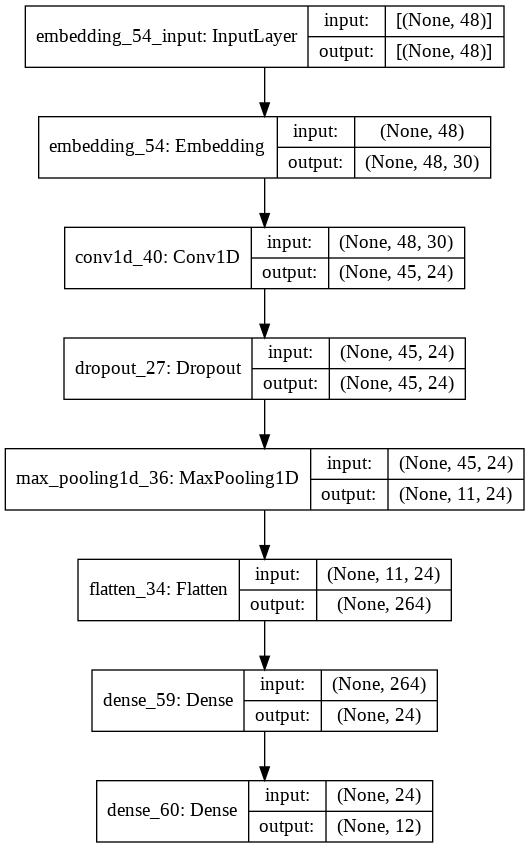

In [143]:
plot_model(model, show_shapes=True, to_file='archi.png')

In [139]:
history = model.fit(comment_train, label_train, epochs=20,validation_data=(comment_test, label_test), verbose=2)

Epoch 1/20
327/327 - 2s - loss: 0.6431 - accuracy: 0.0414 - val_loss: 0.5785 - val_accuracy: 0.1334
Epoch 2/20
327/327 - 2s - loss: 0.4819 - accuracy: 0.1328 - val_loss: 0.4326 - val_accuracy: 0.1345
Epoch 3/20
327/327 - 2s - loss: 0.4077 - accuracy: 0.4226 - val_loss: 0.4032 - val_accuracy: 0.8130
Epoch 4/20
327/327 - 2s - loss: 0.3962 - accuracy: 0.8176 - val_loss: 0.3983 - val_accuracy: 0.8494
Epoch 5/20
327/327 - 2s - loss: 0.3942 - accuracy: 0.8444 - val_loss: 0.3963 - val_accuracy: 0.8609
Epoch 6/20
327/327 - 2s - loss: 0.3936 - accuracy: 0.8577 - val_loss: 0.3951 - val_accuracy: 0.8586
Epoch 7/20
327/327 - 2s - loss: 0.3933 - accuracy: 0.8562 - val_loss: 0.3942 - val_accuracy: 0.8605
Epoch 8/20
327/327 - 2s - loss: 0.3930 - accuracy: 0.8573 - val_loss: 0.3946 - val_accuracy: 0.8609
Epoch 9/20
327/327 - 2s - loss: 0.3927 - accuracy: 0.8583 - val_loss: 0.3939 - val_accuracy: 0.8582
Epoch 10/20
327/327 - 2s - loss: 0.3926 - accuracy: 0.8563 - val_loss: 0.3935 - val_accuracy: 0.8559

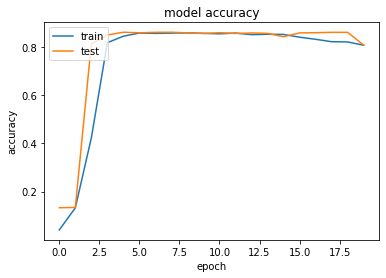

In [140]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


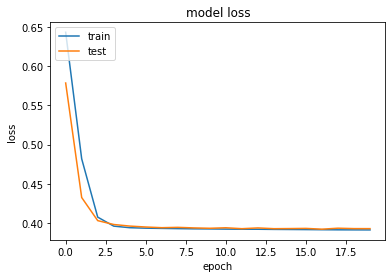

In [141]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [142]:
model.save('abusivetext_best_model.h5')